<h1>Filtros passa-alta:</h1>
<p>Os filtros passa-alta são normalmente usados para realçar os detalhes na imagem tendo como efeito tornar mais nítidas as transições entre regiões diferentes realçando o contraste mas como efeito indesejado enfatizar o ruído presente na imagem.</p2>

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d


In [5]:
def convolution2d(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image


def operadorDirecional(img, gx):
    from scipy.signal import convolve2d
    
    gy = gx.T
    #Gx = convolve2d(img, gx, "same", "symm", fillvalue=0)
    #Gy = convolve2d(img, gy, "same", "symm", fillvalue=0)
    
    Gx = convolution2d(img, gx, 1)
    Gy = convolution2d(img, gy, 1)

    return np.sqrt(Gx**2 + Gy**2)

def plotImagem(img):    
    import matplotlib.pyplot as plt
    obj_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(obj_img)
    plt.show()

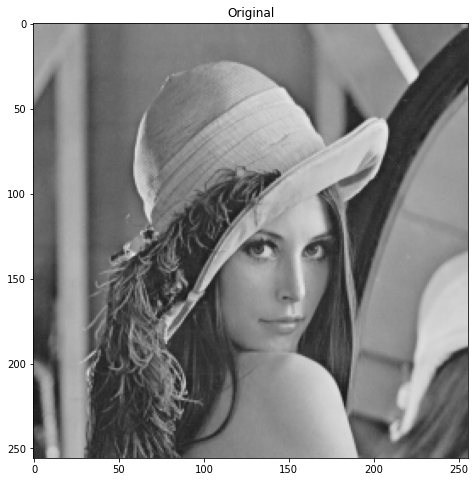

In [6]:
img = cv2.imread('imgs/lena_color_256.tif', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(12,8))
plt.title('Original')
plotImagem(img)

<h3>1 - Laplaciano</h3>
<p>O filtro laplaciano é um filtro isotrópico, ou seja não diferencia direções, bastando uma máscara, sendo mais fácil de implementar, não dá informações sobre a direção da borda mais é sencível a ruído.</p>

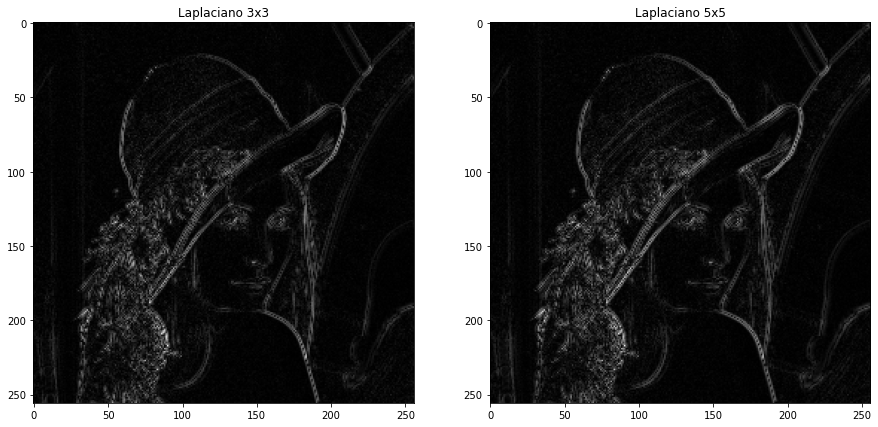

In [7]:
l3x3 = np.asarray([[1,  1, 1],
                   [1, -8, 1],
                   [1,  1, 1]])

l5x5 = np.asarray([[ 0, 0,-1, 0, 0],
                   [ 0,-1,-2,-1, 0],
                   [-1,-2,16,-2,-1],
                   [ 0,-1,-2,-1, 0],
                   [ 0, 0,-1, 0, 0]])

img_laplaciano3x3 = convolve2d(img, l3x3, "same", "symm", fillvalue=0)
img_laplaciano5x5 = convolve2d(img, l5x5, "same", "symm", fillvalue=0)


img_laplaciano3x3 = np.sqrt(2*img_laplaciano3x3**2)
img_laplaciano5x5 = np.sqrt(2*img_laplaciano5x5**2)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.subplot(1,2,1).set_title('Laplaciano 3x3')
plt.imshow(img_laplaciano3x3, 'gray')
plt.subplot(1,2,2)
plt.subplot(1,2,2).set_title('Laplaciano 5x5')
plt.imshow(img_laplaciano5x5, 'gray')


<h3>2 - Prewit</h3>
<p>O filtro Prewitt utiliza duas máscaras que são convoluídas com a imagem original para calcular as derivadas nas direções vertical e horizontal. esse operador é mais simples de ser implementado que o Sobel, mas apresenta mais ruídos.</p>

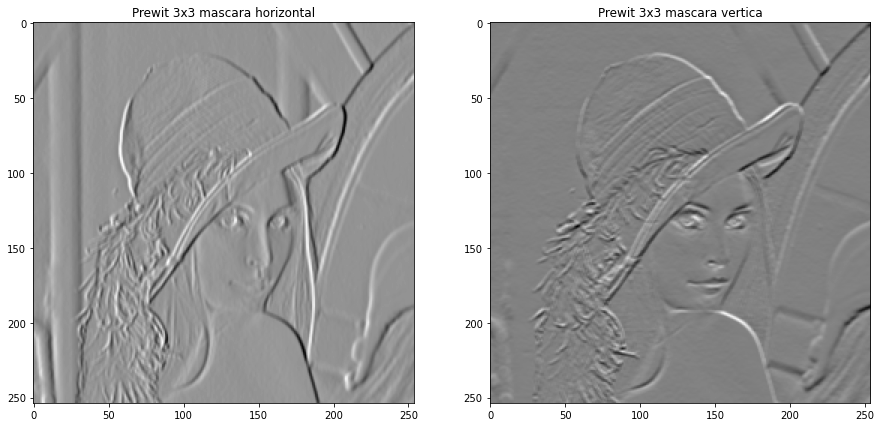

In [8]:
p3x3 = np.asarray([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])


p5x5 = np.asarray([[ 9, 9, 9, 9, 9],
                   [ 9, 5, 5, 5, 9],
                   [-7,-3, 0,-3,-7],
                   [-7,-3,-3,-3,-7],
                   [-7,-7,-7,-7,-7]])

img_prewit_x = convolution2d(img, p3x3, 1) #máscara 3x3 na horizontal
img_prewit_y = convolution2d(img, p3x3.T, 1) #máscara 3x3 na vertical

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.subplot(1,2,1).set_title('Prewit 3x3 mascara horizontal')
plt.imshow(img_prewit_x, 'gray')
plt.subplot(1,2,2)
plt.subplot(1,2,2).set_title('Prewit 3x3 mascara vertica')
plt.imshow(img_prewit_y, 'gray')


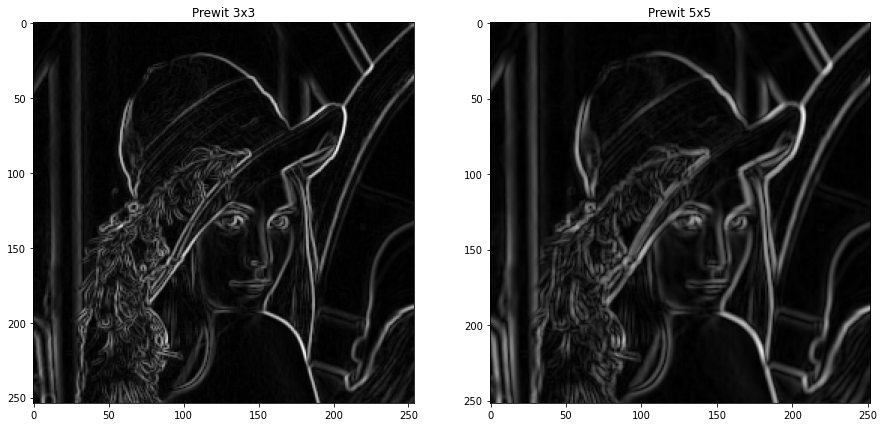

In [9]:
img_prewit3x3 = operadorDirecional(img, p3x3)
img_prewit5x5 = operadorDirecional(img, p5x5)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.subplot(1,2,1).set_title('Prewit 3x3')
plt.imshow(img_prewit3x3, 'gray')
plt.subplot(1,2,2)
plt.subplot(1,2,2).set_title('Prewit 5x5')
plt.imshow(img_prewit5x5, 'gray')
img_prewit3x3 = operadorDirecional(img, p3x3)
img_prewit5x5 = operadorDirecional(img, p5x5)


<h3>3 - Sobel</h3>
<p>O filtro Sobel utiliza duas máscaras deslocadas em 90° para encontrar os gradientes verticais e horizontais das bordas semelhante ao operador de Prewitt, porém com mais peso nos pontos próximos ao pixel central. Por esse motivo, a máscara de Sobel obtém as bordas mais destacadas em relação ao operador de Prewitt sendo muito menos sensível ao ruído.
</p>

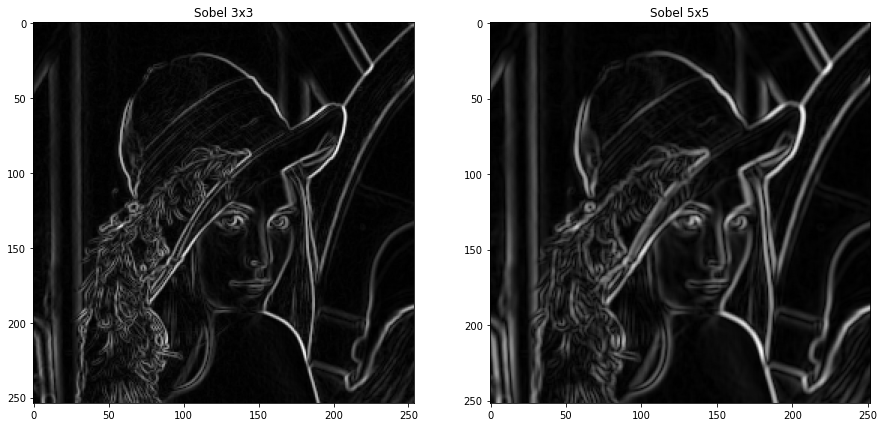

In [10]:
s3x3 = np.asarray([[ 1,  0, -1],
                   [ 2,  0, -2],
                   [ 1,  0, -1]])


s5x5 = np.asarray([[ 2, 2, 4, 2, 2],
                   [ 1, 1, 2, 1, 1],
                   [ 0, 0, 0, 0, 0],
                   [-1,-1,-2,-1,-1],
                   [-2,-2,-4,-2,-2]])

sobel3x3 = operadorDirecional(img, s3x3)
sobel5x5 = operadorDirecional(img, s5x5)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.subplot(1,2,1).set_title('Sobel 3x3')
plt.imshow(sobel3x3, 'gray')
plt.subplot(1,2,2)
plt.subplot(1,2,2).set_title('Sobel 5x5')
plt.imshow(sobel5x5, 'gray')


In [14]:
len(sobel5x5)

252